In [14]:
%run '../rootlib.ipynb'
chain = R.TChain( "mxq" )
chain.Add( "mxq.root" )

1

In [15]:
c1 = Canvas( width = 1000, height = 600 )

In [16]:
def adcE( tube ):
    return "adcEast[" + str(tube) + "]"
def tdcE( tube ):
    return "tdcEast[" + str(tube) + "]"
def safeE( tubes ):
    ss = ""
    for tube in tubes :
        ss += tdcE( tube ) + " > 150 && " + adcE( tube ) + " > 10 &&"
    ss += "1"
    return ss
def adcW( tube ):
    return "adcWest[" + str(tube) + "]"
def tdcW( tube ):
    return "tdcWest[" + str(tube) + "]"
def safeW( tubes ):
    ss = ""
    for tube in tubes :
        ss += tdcW( tube ) + " > 150 && " + adcW( tube ) + " > 10 &&"
    ss += "1"
    return ss
R.gStyle.SetOptFit( 111 )

In [17]:
def sigmaFrom( a, b ) :
    if 0 == a or 4 == a or 8 == a or 12 == a : return 0
    if 0 == b or 4 == b or 8 == b or 12 == b : return 0
    chain.Draw( "29.979 * 0.0188 * ( " + tdcW( a ) + "-" + tdcE( b ) + ") / 2.0 - vertexZ >> vZ( 30, -15, 15 )", "fastAdcEast>10 && fastAdcWest>10", "colz" )
    vZ = R.gDirectory.Get( "vZ" )
    ff = R.TF1( "fgaus", "gaus" )
    vZ.Fit( ff )
    return ff.GetParameter(2)
def sigmaErrorFrom( a, b ) :
    if 0 == a or 4 == a or 8 == a or 12 == a : return 0
    if 0 == b or 4 == b or 8 == b or 12 == b : return 0
    chain.Draw( "29.979 * 0.0188 * ( " + tdcW( a ) + "-" + tdcE( b ) + ") / 2.0 - vertexZ >> vZ( 30, -15, 15 )", "fastAdcEast>10 && fastAdcWest>10", "colz" )
    vZ = R.gDirectory.Get( "vZ" )
    ff = R.TF1( "fgaus", "gaus" )
    vZ.Fit( ff )
    return ff.GetParError(2)

In [34]:


hSigmas = R.TH1D( "sigmas", "sigmas", 140, 0, 140 )
sigmaVals = []
sigmaErrs = []
for a in range( 0, 16 ) :
    for b in range( 0, 16 ):
        val = sigmaFrom( a, b )
        sigmaVals.append( val )
        sigmaErrs.append( sigmaErrorFrom( a, b ) )

In [35]:

iBin = 1
for v, e in zip( sigmaVals, sigmaErrs) :
    if 0 != v :
        hSigmas.SetBinContent( iBin, v )
        hSigmas.SetBinError( iBin, e )
        iBin = iBin+1

## Vertex Resolution using random pairs of not-earliest TACs

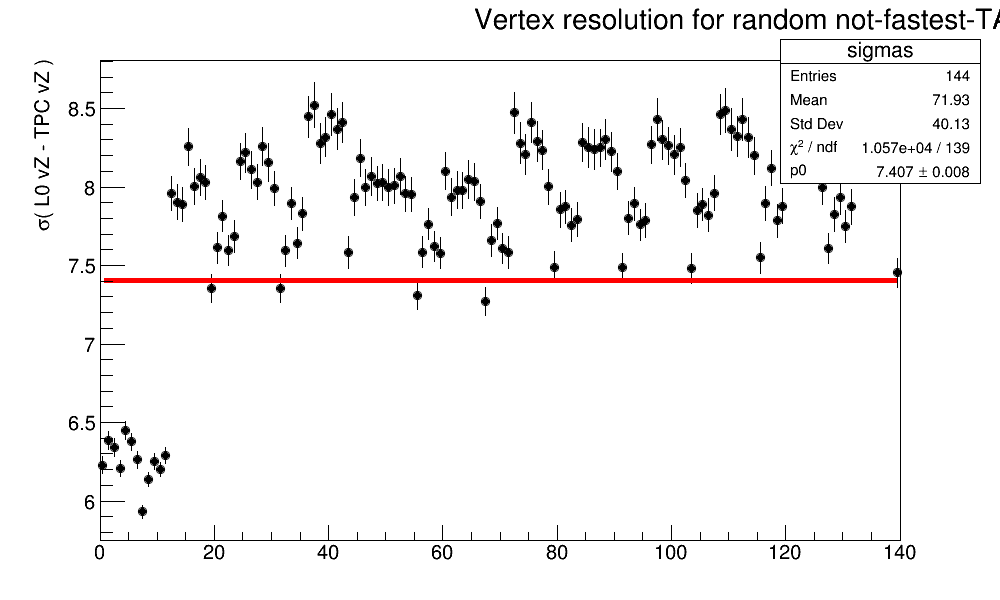

In [36]:

fpol = R.TF1( "fpol", "pol0" )
hSigmas.Draw("pe")
fpol.SetLineWidth(5)
fpol.SetLineColor( R.kRed )
hSigmas.Fit( fpol )
hSigmas.SetTitle( "Vertex resolution for random not-fastest-TAC pairs; ; #sigma( L0 vZ - TPC vZ )" )

c1

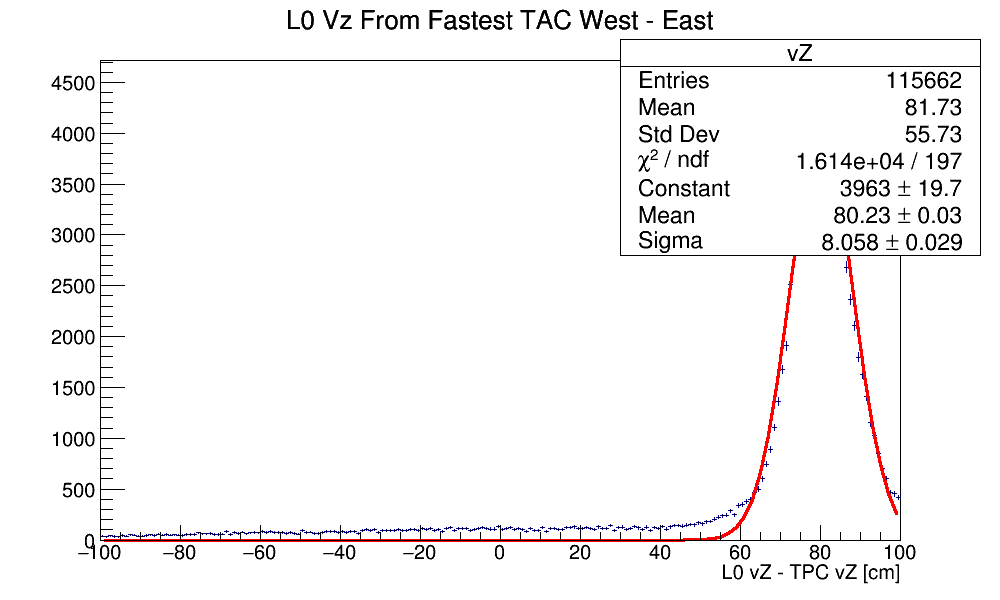

In [31]:
chain.Draw( "29.979 * 0.0188 * ( fastTdcWest - fastTdcEast ) / 2.0 - vertexZ >> vZ( 200, -100, 100 )", "fastAdcEast>10 && fastAdcWest>10 && fastTdcEast>300 && fastTdcWest>300", "colz" )
vZ = R.gDirectory.Get( "vZ" )
ff = R.TF1( "fgaus", "gaus" )
ff.SetLineColor( R.kRed )
ff.SetLineWidth( 3 )
vZ.Fit( ff )
vZ.SetTitle( "L0 Vz From Fastest TAC West - East; L0 vZ - TPC vZ [cm]" )
c1

In [29]:
(5.866 - 4.375) / 5.866

0.25417661097852023

In [48]:
( 4.375 - 5.866) / 4.375

-0.34079999999999994

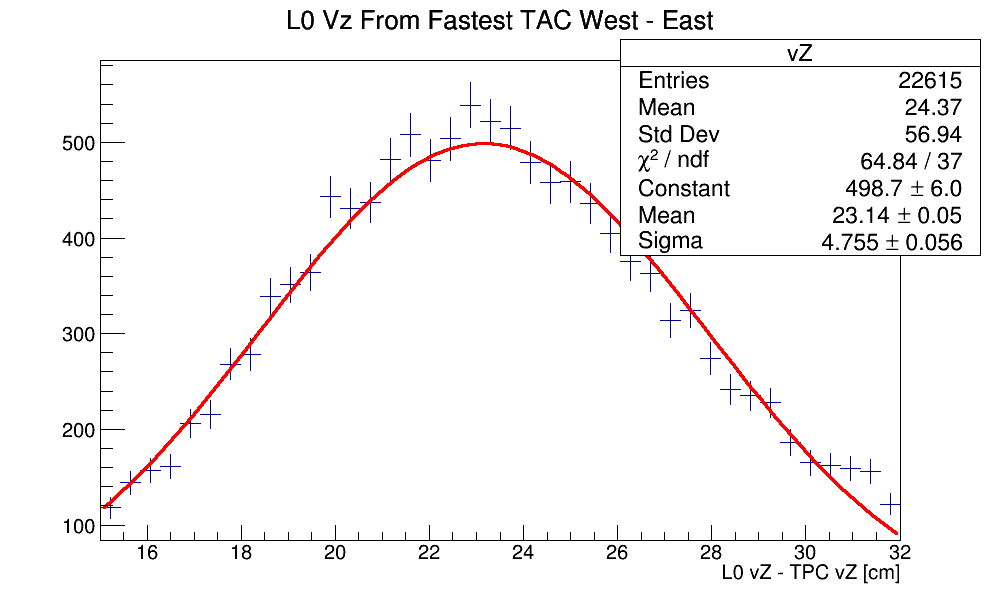

In [28]:
chain.Draw( "29.979 * 0.0188 * ( (fastTdcWest - tdcWest[ fastPulserChWest ]) - (fastTdcEast - tdcEast[ fastPulserChEast ] ) ) / 2.0 - vertexZ >> vZ( 40, 15, 32 )", "fastAdcEast>10 && fastAdcWest>10 && fastPulserChEast==0 && fastPulserChWest==4", "colz" )
vZ = R.gDirectory.Get( "vZ" )
ff = R.TF1( "fgaus", "gaus" )
ff.SetLineColor( R.kRed )
ff.SetLineWidth( 3 )
vZ.Fit( ff )
vZ.SetTitle( "L0 Vz From Fastest TAC West - East; L0 vZ - TPC vZ [cm]" )
c1

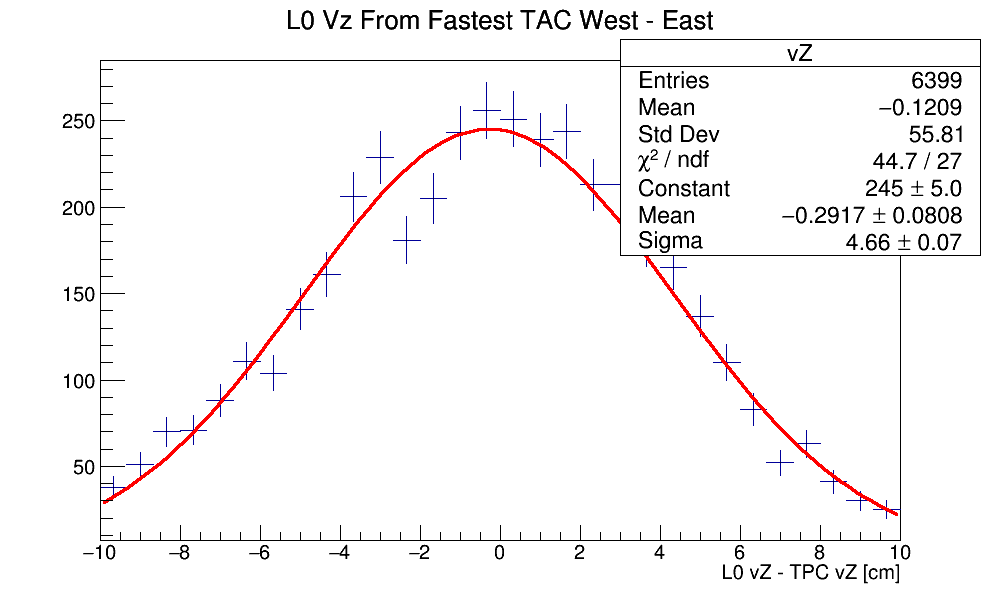

In [28]:
chain.Draw( "29.979 * 0.0188 * ( (fastTdcWest ) - (fastTdcEast ) ) / 2.0 - vertexZ >> vZ( 30, -10, 10 )", "fastAdcEast>10 && fastAdcWest>10 && fastPulserChEast==8 && fastPulserChWest==8", "colz" )
vZ = R.gDirectory.Get( "vZ" )
ff = R.TF1( "fgaus", "gaus" )
ff.SetLineColor( R.kRed )
ff.SetLineWidth( 3 )
vZ.Fit( ff )
vZ.SetTitle( "L0 Vz From Fastest TAC West - East; L0 vZ - TPC vZ [cm]" )
c1

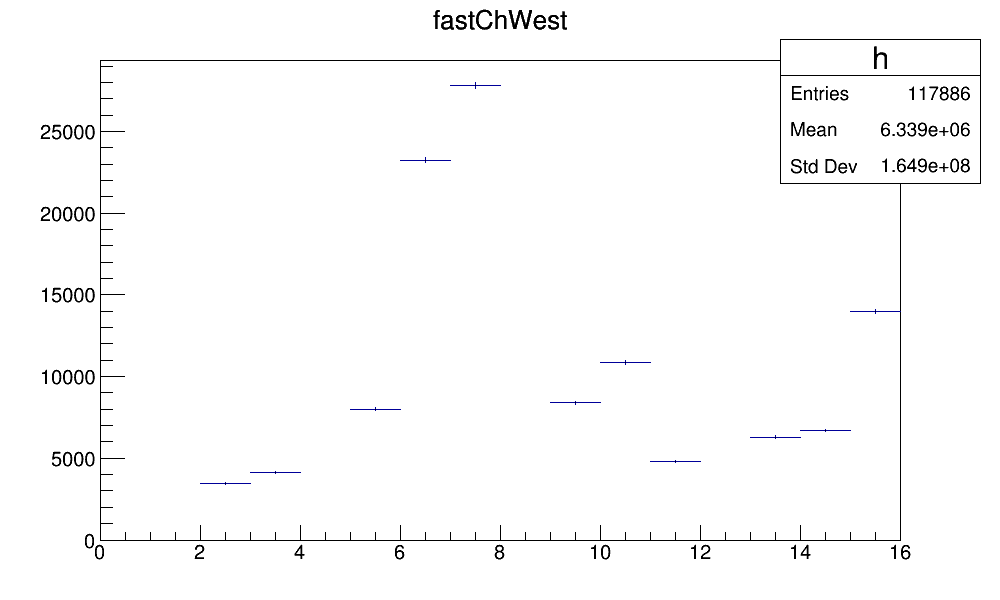

In [58]:
chain.Draw( "fastChWest>>h(16, 0, 16)" )
c1

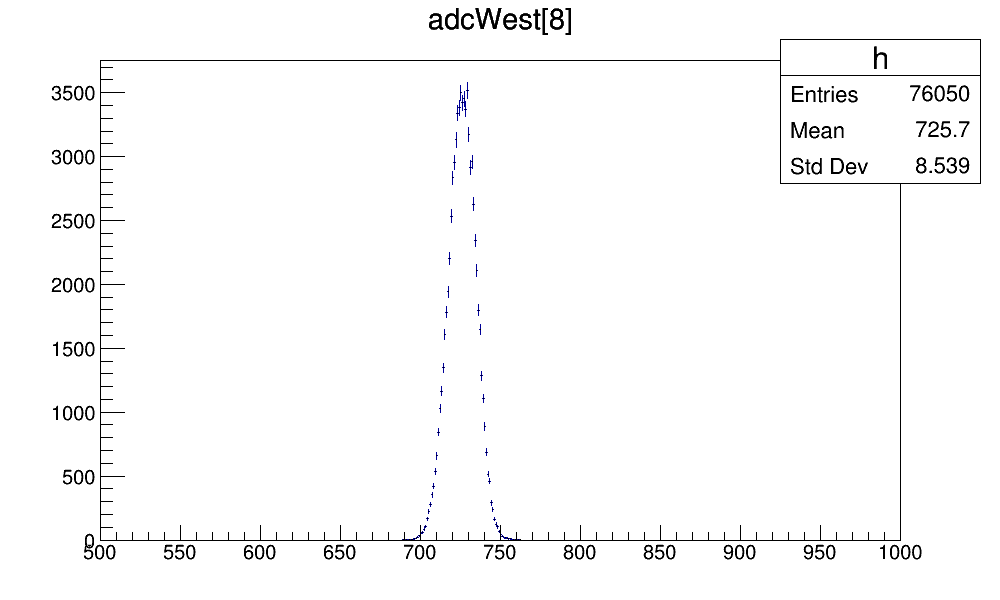

In [12]:
chain.Draw( "adcWest[8]>>h(500, 500, 1000)" )
c1

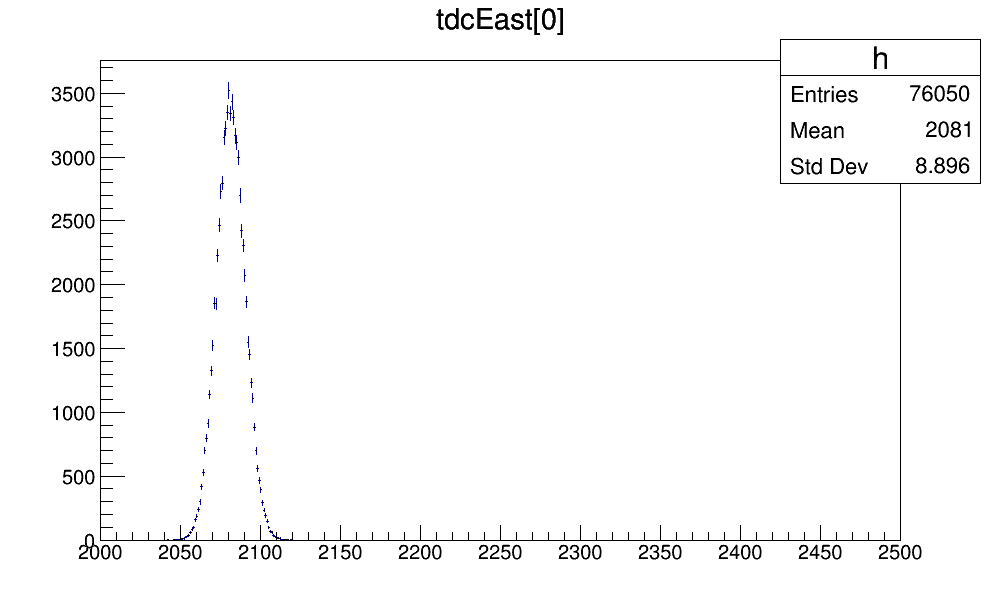

In [13]:
chain.Draw( "tdcEast[0]>>h(500, 2000, 2500)" )
c1

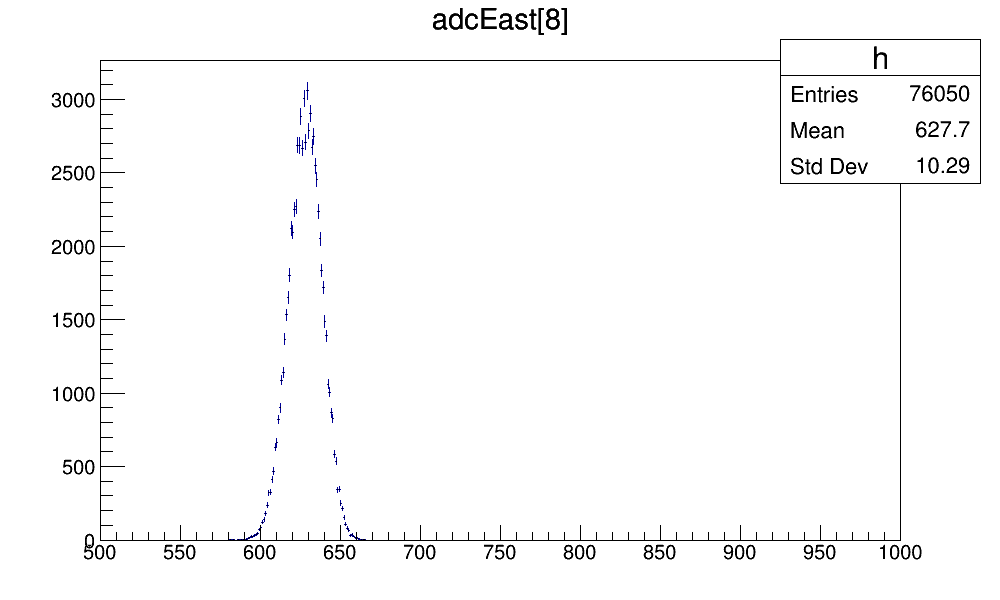

In [6]:
chain.Draw( "adcEast[8]>>h(500, 500, 1000)" )
c1

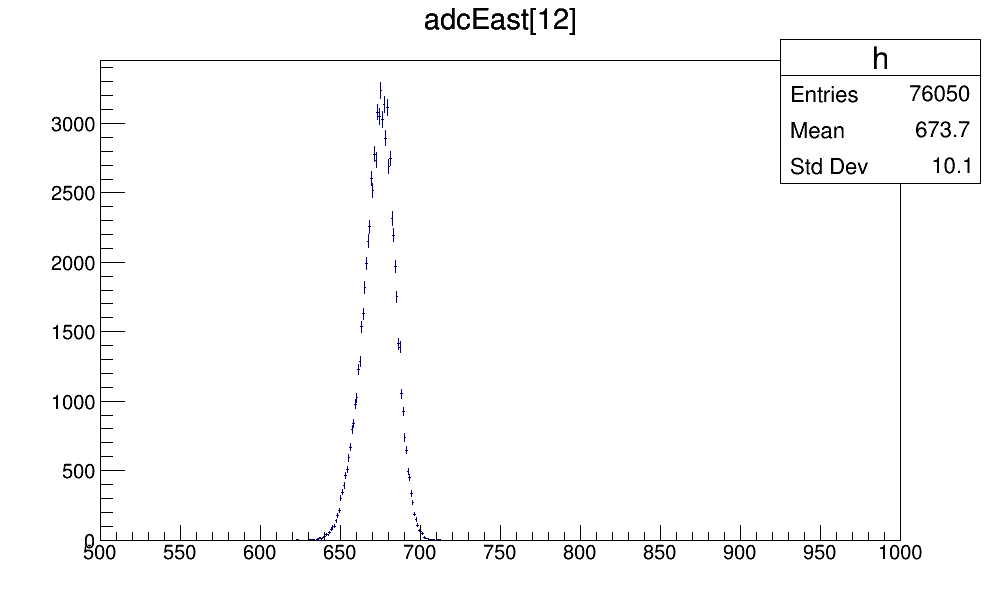

In [7]:
chain.Draw( "adcEast[12]>>h(500, 500, 1000)" )
c1